In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
classlabels = []
file_name = 'label.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [3]:
confiq_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv.dnn_DetectionModel(frozen_model, confiq_file)

In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 00000137719FFBF0>

In [6]:
print(len(classlabels))
print(classlabels)
print(classlabels[73])

90
['person', 'bicycle', 'car', 'motorbike', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic_light', 'fire_hydrant', 'something', 'stop_sign', 'parking_meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'something', 'backpack', 'umbrella', 'something', 'something', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports_ball', 'kite', 'baseball_bat', 'baseball_glove', 'skateboard', 'surfboard', 'tennis_racket', 'bottle', 'something', 'wine_glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot_dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'potted_plant', 'bed', 'something', 'dining_table', 'something', 'something', 'toilet', 'something', 'tv_monitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell_phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'something', 'book', 'clock', 'vase', 'scissors', 'teddy_bear', 'hair_drier', 'toothbrush']

In [7]:
image = cv.imread('photos/combo.jpg')

In [8]:
classIndex, confidence, bbox = model.detect(image, confThreshold = 0.5)
print(classIndex,',',  confidence,',',  bbox)

[3 2 8 4] , [0.79181635 0.78279185 0.71728194 0.66483325] , [[652  54 543 275]
 [ 83 459 453 299]
 [614 420 633 340]
 [105  71 420 256]]


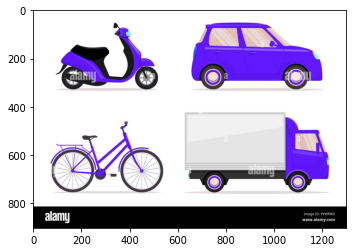

In [10]:
plt.imshow(image)

In [18]:
image2 = cv.imread('photos/50.jpg')

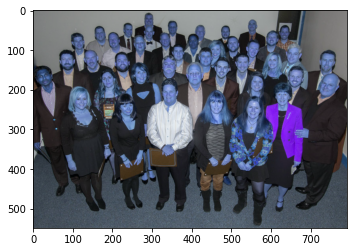

In [19]:
plt.imshow(image2)

In [20]:
classIndex2, confidence2, bbox2 = model.detect(image2, confThreshold = 0.5)
print(classIndex2,',',  confidence2,',',  bbox2)

[1 1 1 1 1 1 1 1 1 1 1 1] , [0.77569383 0.7694679  0.76119155 0.7140157  0.63969857 0.6207468
 0.60497075 0.5573536  0.5420667  0.52440083 0.52277666 0.5076962 ] , [[ 63 204 131 314]
 [289 185 110 334]
 [402 207 105 319]
 [515 214 124 318]
 [658 140 132 373]
 [608 156 102 359]
 [471 221 133 304]
 [191 214 111 306]
 [ 94 100  92 143]
 [ 12  12 769 475]
 [225 129  86 166]
 [177 212  97 221]]


In [21]:
count = 0
for i in classIndex2:
    if i == 1:
        count = count + 1

In [22]:
print(count)

12


0
person
0
person
0
person
0
person
0
person
0
person
0
person
0
person
0
person
0
person
0
person
0
person


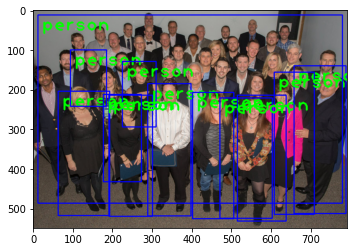

In [23]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex2.flatten(), confidence2.flatten(), bbox2):
    cv.rectangle(image2, boxes, (255, 0, 0), 2)
    print(classInd - 1)
    print(classlabels[classInd - 1])
    cv.putText(image2, classlabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, (0, 255, 0), 3)

image = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()